Identify best cities to invest in real estate
    This does not apply to super expensive cities like Down town San Francisco or Manhattan
    This does not apply to very bad neightborhoods (warzones)
## CITIES REALFOCUS FACTORS   
### 1. Population growth
 Population data is retrieved from https://www.city-data.com

| City type | Population | Ideal Rate of Growth (2000-2017) | Ideal rate of growth per year afterwards
| :- | :- |:- | :- |
| Large metro cities | 1-2 Million | 15% | 1%
| Micro cities | < 250k | 30% | 1.5%
| Moderate | 250k-1 Million | 21.25% | 1.25


### 2. Median Household Income
    Look for 31.5% income growth between 2000 and 2017. Applies to cities of all cities. In 2021 add 1.25%
    Data is retrieved from https://www.city-data.com


### 3. Median House/Condo Value 
    Look for 42.5% growth between 2000 and 2016. Applies to cities of all sizes. In 2021 add 2.5%
    Data is retrieved from https://www.city-data.com

### 4. Change in Crime Levels
    Look for the most recent crime number below 500. Applies to cities of all sizes.
    Data is retrieved from https://www.city-data.com

### 5. Month Job Growth

| City type | Population | Annulized Rate of Growth (2000-2017) 
| :- |:- | :- |
| Large metro cities | > 1 Million | 1.5%
| Other cities| <  1 Million | 2%

    No need to +/- for beyond years
    
### 5. NEIGHBORHOOD REALFOCUS
    
### 1. Poverty Level

    The neighborhood's poverty rate should be under 25%, but under 15% preferred if you are risk-averse


Reference: Webinar by




In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cities_data = 'data/cities_market_data.csv'
df = pd.read_csv(cities_data)
df.head()

# pd.set_option('display.max_rows', None)
# df.loc[:,'city']


,city,population_2000,population_2017,pop_growth_%,median_income_2000,median_income_2017,income_growth_%,median_house_2000,median_house_2017,median_house_growth_%,crime_index_2005,crime_index_2018,crime_increase_%,poverty_rate_%
0,Flint-Michigan,124932,96448,-22.8,28015,26901,-3.98,49100,27400,-44.20,1000.1,670.5,-11.54,38.9
1,Detroit-Michigan,950711,673104,-29.2,29526,30344,2.77,62800,50200,-20.06,1042.3,838.2,-8.41,34.5
2,Youngstown-Ohio,81984,64604,-21.2,24201,28843,19.18,40700,41400,1.72,752.9,440.0,3.46,34.9
3,Gary-Indiana,102713,76008,-26.0,27195,26669,-1.93,51900,66900,28.90,626.8,436.7,0.82,36.3
4,Reading-Pennsylvania,81196,88423,8.9,26698,31160,16.71,45000,70000,55.56,724.7,358.7,4.86,30.7


In [5]:
# applying the location factors
popln_growth_filter = (((df['population_2017'] > 1000000) & (df['pop_growth_%'] > 15)) |
                       (df['population_2017'].between(250000, 1000000) & df['pop_growth_%'] > 21.25) |
                       ((df['population_2017'] < 250000) & (df['pop_growth_%'] > 30)))

median_income_filter = df['income_growth_%'] > 31.5
median_house_filter = df['median_house_growth_%'] > 42.5
crime_level_filter = df['crime_index_2018'] < 500
poverty_rate_filter = df['poverty_rate_%'] < 25

df_filter = df.loc[popln_growth_filter & median_income_filter & median_house_filter & crime_level_filter & poverty_rate_filter, :]

#playing around
pop_filter = df['population_2017'] > 80000
median_house_filter = df['median_house_2017'] < 200000

df_filter = df_filter.loc[pop_filter & median_house_filter,:]

df_filter.info()
df_filter

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 55 to 301
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   14 non-null     object 
 1   population_2000        14 non-null     int64  
 2   population_2017        14 non-null     int64  
 3   pop_growth_%           14 non-null     float64
 4   median_income_2000     14 non-null     int64  
 5   median_income_2017     14 non-null     int64  
 6   income_growth_%        14 non-null     float64
 7   median_house_2000      14 non-null     int64  
 8   median_house_2017      14 non-null     int64  
 9   median_house_growth_%  14 non-null     float64
 10  crime_index_2005       14 non-null     float64
 11  crime_index_2018       14 non-null     float64
 12  crime_increase_%       14 non-null     float64
 13  poverty_rate_%         14 non-null     float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.6+ KB


,city,population_2000,population_2017,pop_growth_%,median_income_2000,median_income_2017,income_growth_%,median_house_2000,median_house_2017,median_house_growth_%,crime_index_2005,crime_index_2018,crime_increase_%,poverty_rate_%
55,Killeen-Texas,86906,145482,67.4,34461,45404,31.75,72500,128300,76.97,559.7,258.0,7.41,15.5
64,Lakeland-Florida,78470,108054,37.7,33119,46466,40.30,71500,150800,110.91,411.8,259.6,-14.21,16.4
77,San-Antonio-Texas,1144546,1511946,32.1,36214,50044,38.19,67500,148200,119.56,496.3,395.1,3.46,17.3
78,Grand-Prairie-Texas,127440,193837,52.1,46816,67099,43.32,82000,164000,100.00,379.0,186.2,2.46,9.8
92,Edinburg-Texas,48459,90280,86.3,28938,55392,91.42,57100,115200,101.75,586.6,283.2,42.14,22.2
109,Clarksville-Tennessee,103446,153205,48.1,37548,55021,46.54,83500,153800,84.19,397.5,325.8,-6.56,14.2
117,Pompano-Beach-Florida,78183,110473,41.3,36073,49419,37.00,94700,197400,108.45,687.5,433.3,17.42,18.4
126,Houston-Texas,1953308,2312717,18.4,36616,50896,39.00,77500,173600,124.00,659.6,497.7,0.06,20.6
132,Hemet-California,58812,85160,44.8,26839,39801,48.30,69900,194900,178.83,438.5,327.2,-6.20,20.2
157,Joliet-Illinois,106195,148462,39.8,47761,65725,37.61,116600,179700,54.12,265.7,176.1,-5.61,9.0


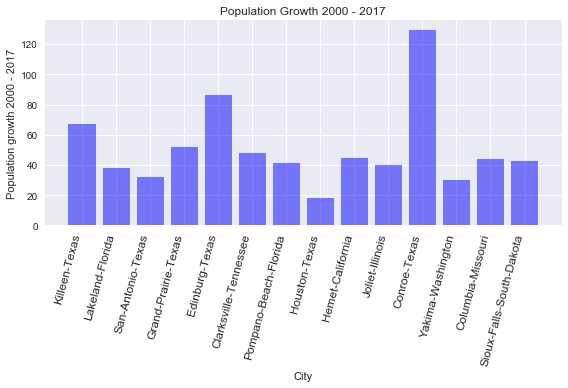

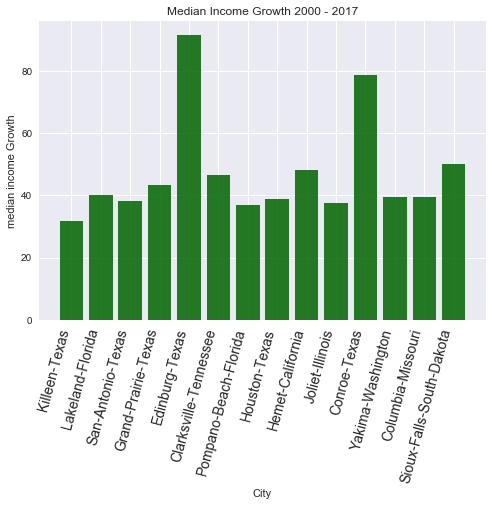

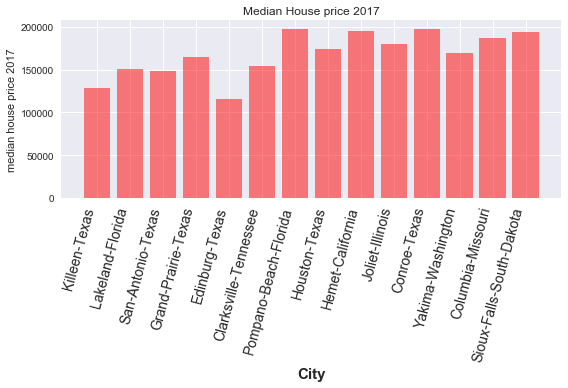

In [6]:
plt.style.use('seaborn')

cities = df_filter.loc[:,'city'].values
pop_growth = df_filter.loc[:,'pop_growth_%'].values

# plt.subplot(1, 1, 1)
plt.bar(cities, pop_growth, color ='blue', alpha=0.5)
plt.xlabel("City")
plt.ylabel("Population growth 2000 - 2017")
plt.title('Population Growth 2000 - 2017')
plt.xticks(rotation=75, size=12, horizontalalignment="right")
plt.tight_layout()
plt.show()

median_income = df_filter.loc[:,'income_growth_%'].values
# plt.subplot(1, 2, 2)
plt.bar(cities, median_income, color = 'darkgreen', alpha = 0.85)
plt.xlabel("City")
plt.ylabel("median income Growth")
plt.title('Median Income Growth 2000 - 2017')
plt.xticks(rotation=75, size=14, horizontalalignment="right")
# plt.tight_layout()
plt.show()

median_house_2017 = df_filter.loc[:,'median_house_2017'].values
# plt.subplot(1, 2, 2)
plt.bar(cities, median_house_2017, color ='red', alpha=0.5)
plt.xlabel("City", fontsize = 15, weight = 'bold')
plt.ylabel("median house price 2017")
plt.title('Median House price 2017')
plt.xticks(rotation=75, size=14, horizontalalignment="right")
plt.tight_layout()
plt.show()
